# Lab Assignment Two: Exploring Image Data 

# Team Member Information:

In [1]:
import pandas as pd
names1 = ['Jiaqi Song','Yuchao Zhang','Zhenxuan Ouyang','Jianmin Li']
smuid = [47534426, 47787029, 47784546, 47794972]
teaminfo = pd.DataFrame()
teaminfo['name'] = names1
teaminfo['smu id'] = smuid
teaminfo

name    smu id
0       Jiaqi Song  47534426
1     Yuchao Zhang  47787029
2  Zhenxuan Ouyang  47784546
3       Jianmin Li  47794972

# 1. Bussiness understanding

#### Give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). What is the prediction task for your dataset and which third parties would be interested in the results? Why is this data important? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties? Be specific and use your own words to describe the aspects of the data. 

The Facial Expression Recognition dataset contains 35587 images, which has 1 numeric feature for image pixels and 1 categorical feature for facial expressions. But due to the large amount of images, we choose 1500 images for this task. Each image consists of a 48x48 pixel grayscale face that has been automatically registered to be centered and occupy about the same amount of space. Along with each image, there is a categorical number that represents the feeling of people inside the image (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral), which is also the prediction task for this lab.

The facial expression classifier could be helpful for security department and police to prevent some crimes happending. Crimes are everywhere, but if they are conducted in public places such as airports, rail stations and shopping mall, the damage could be extremely serious. According to the report of terrorist attacks* worldwide in 2016, there are 232, 228, 32 attacks targeting at Educational Institution, Transportation and Airport&Airlines respectively. With the help of CCTVs in these areas, the security department not only can have real time monitoring, but also get real time face image capturing. With our algorithm, the security department could know what their facial expressions represent and even how long they have kept that expression. Usually, what people feel is linked to their facial expressions. Lie To Me, a American tv series that goes by a motto "Words can lie but face can't", also emphasizes that facial expressions have strong correaltion with how people feel or what people think at the moment. If someone is going to drop a backpack with a bomb inside or take a gun out, he is more likely to be anxious and nervous rather than happy and excited. Then, if someone has kept a fearful and anxious face for a long time, the security department should send a guard to check what is going on, which may increase their efficiency, instead of randomly selecting people to do security check.

Overall, the analytics can be helpful for security department to improve efficiency of selecting target to do detail check and try to prevent crimes from happening.

### Mesures of success:

For the learning algorithm performming on this dataset, we should expect the feeling recognition accuracy can reach 60%. Obviously, 100% of accuracy is impossible to reach, and people may have various expressions of the same feelings, and sometimes "anxious" face looks similar to "netural" face which confuses the algorithm. And we hope that policemen and security department can be 10-20% more efficient in selecting target.

*Report: https://www.state.gov/documents/organization/272485.pdf

Dataset Reference: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

# 2. Data Preparation

## 2.1 Read in Images as Numpy Arrays &
## 2.2 Linearize the Images to Create a Table of 1-D Image Features

In [2]:
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import missingno as mn

# load the dataset 
df = pd.read_csv('fer2013.csv')

First we load the dataset to dataframe in pandas

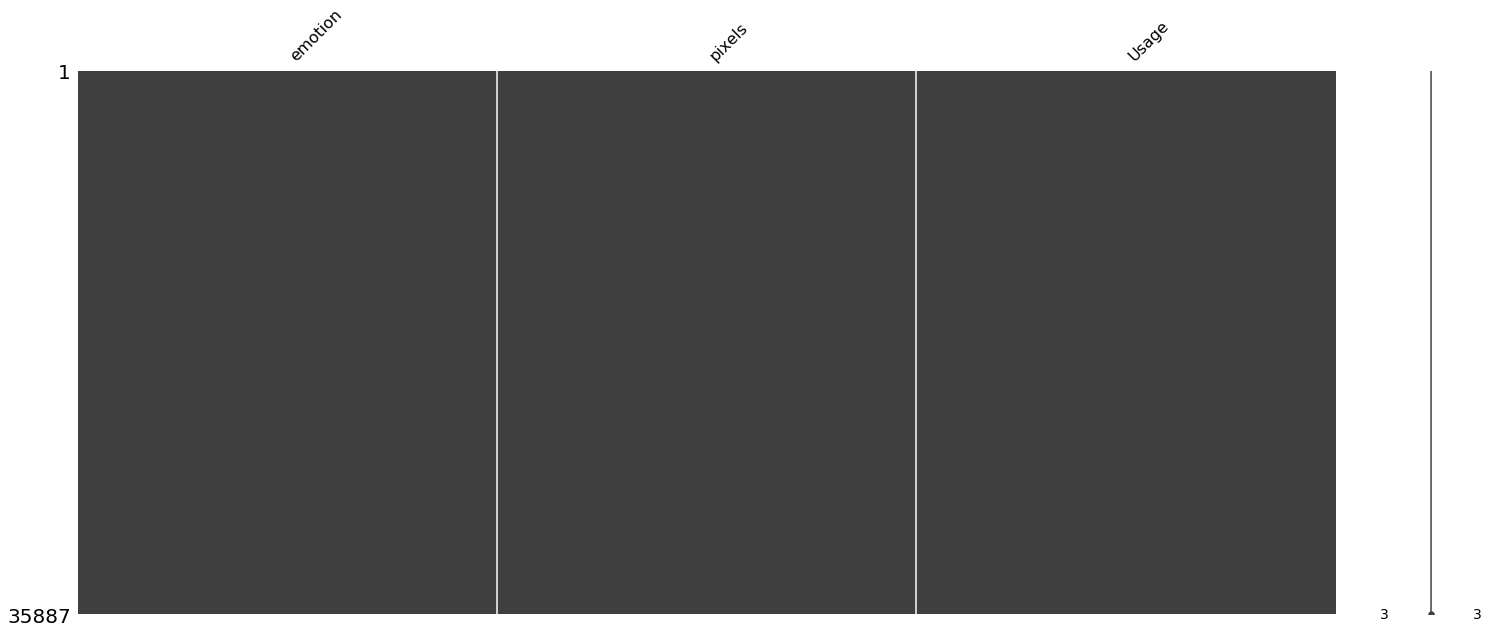

In [3]:
mn.matrix(df.sort_values(by=["pixels"]))

We checked if there is non-value in the image dataset, and we can see there is not.

In [4]:
# random select 1500 samples
df2 = df.sample(n=1500, random_state=2)
df2 = df2.reset_index(drop=True)

# convert the pixels column to numpy.array 
df3 = df2.copy()
for i in range(len(df3.pixels)):
    df3.pixels[i] = np.array(list(map(int,df3.pixels[i].split(' '))))

df3.head(5)

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


emotion                                             pixels        Usage
0        4  [32, 31, 31, 33, 37, 33, 73, 102, 92, 67, 57, ...     Training
1        4  [26, 30, 39, 52, 71, 90, 106, 118, 128, 115, 1...   PublicTest
2        3  [86, 115, 170, 204, 208, 216, 213, 221, 208, 1...  PrivateTest
3        4  [8, 8, 2, 1, 5, 7, 9, 25, 45, 54, 57, 117, 184...     Training
4        4  [50, 51, 54, 61, 68, 70, 76, 80, 83, 84, 89, 1...     Training

Due to the large amount of data, we randomly choose 1500 images. Because the pixel of each sample in the original dataset is a string, we split the pixel string of each sample by blank space first, then convert the data type from str to int and then convert the pixel list in each row to an numpy array. Now the pixel of each row(sample) is in an numpy array.

In [5]:
X = np.array([i for i in df3.pixels])
y = np.array([i for i in df3.emotion])

Then we extract the pixel numpy array of each row from pandas dataframe and then put pixel numpy array of all the samples into a final numpy array X. We also do the same thing to the emotion feature. Now each row of the final numpy array X represents an image.

## 2.3 Visualization of Several Images

In [6]:
h = 48
w = 48
names = [0] * 7
names[0] = 'Angry'
names[1] = 'Disgust'
names[2] = 'Fear'
names[3] = 'Happy'
names[4] = 'Sad'
names[5] = 'Surprise'
names[6] = 'Neutral'

In [7]:
def plot_gallery1(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

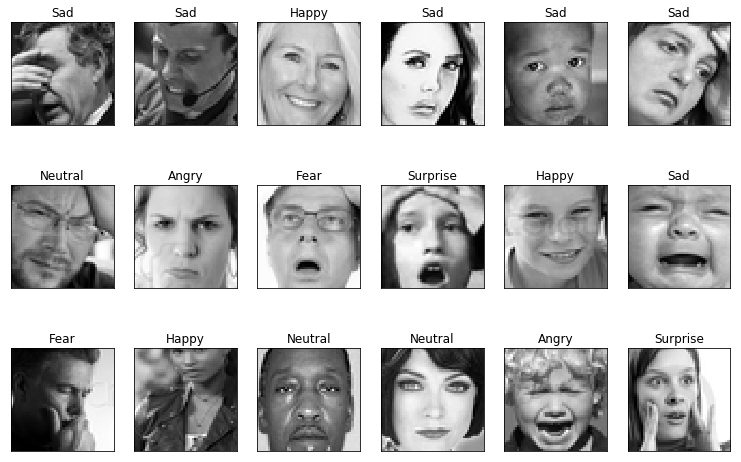

In [8]:
def plot_gallery(images, emotions, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[emotions[i]], size=12)
        plt.xticks(())
        plt.yticks(())

plot_gallery(X, y, names, h, w) # defaults to showing a 3 by 6 subset of the faces

First we defined the height(48) and the width(48) of the picture. Then we defined a plot function for visualizing image, and we visualized 18 faces from the whole dataset.

# 3. Data Reduction 

## 3.1 Linear Reduction
#### Perform linear dimensionality reduction of the images using principal components analysis. Visualize the explained variance of each component. Analyze how many dimensions are required to adequately represent your image data. Explain your analysis and conclusion.

In [9]:
# manipulated from Sebastian Raschka Example (your book!)
# also from hi blog here: http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html


def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })

In [11]:
from sklearn.decomposition import PCA

n_components = 350
print ("Extracting the top %d eigenfaces from %d faces" % (
    n_components, X.shape[0]))

pca = PCA(n_components=n_components)
%time pca.fit(X.copy())
eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 350 eigenfaces from 1500 faces
Wall time: 631 ms


In [12]:
plot_explained_variance(pca)

First we defined a plot function for visualizing explained variance of each component from PCA. And we extracted 350 eigenfaces from the image dataset. Then we visualized the explained variance of each component from PCA. From the visualization, we can see these 350 eigenfaces represents over 97% the image data. So we decided using 350 dimensions to represent the image data.

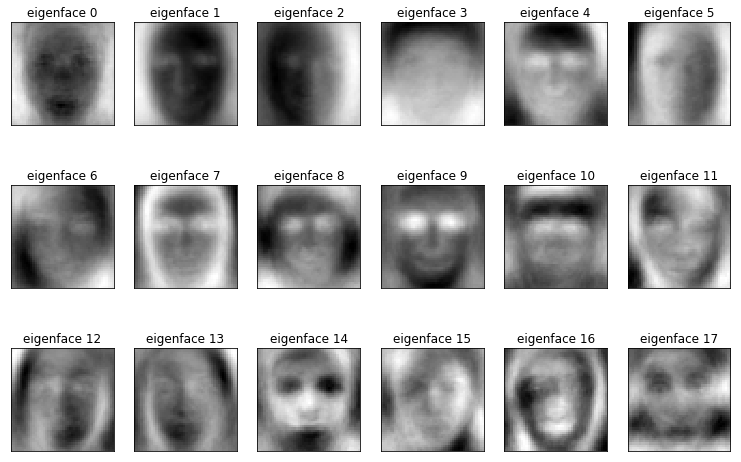

In [13]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery1(eigenfaces, eigenface_titles, h, w)

We also visualized the 18 eigenfaces. 

In [14]:
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image
    
idx_to_reconstruct = int(np.random.rand(1)*len(X))
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca, X_idx.reshape(1, -1))

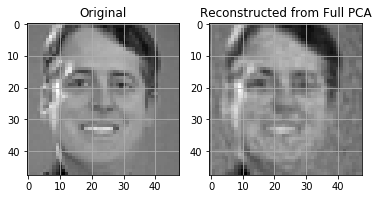

In [15]:
plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Full PCA')
plt.grid()

We randomly chose an image to be reconstructed after conducting PCA. And as we can see from above images, the reconstruction from PCA is not so good. 

## 3.2 Non-Linear Reduction

#### Perform non-linear dimensionality reduction of your image data.

In [16]:
from sklearn.decomposition import KernelPCA

n_components = 350
print ("Extracting the top %d eigenfaces from %d faces, not calculating inverse transform" % (n_components, X.shape[0]))

kpca = KernelPCA(n_components=n_components, kernel='rbf', fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter, 
                 remove_zero_eig=True)  
kpca.fit(X.copy())

Extracting the top 350 eigenfaces from 1500 faces, not calculating inverse transform


KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=True, gamma=12, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=350, n_jobs=None,
     random_state=None, remove_zero_eig=True, tol=0)

Now we conducted non-linear dimensionality reduction using Kernel PCA. And we still use 350 dimensions for dimensionality reduction.

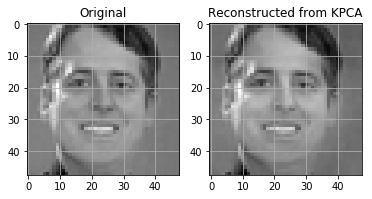

In [17]:
X_idx = X[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image_kpca = reconstruct_image(kpca, X_idx.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid()
plt.subplot(1,2,2)
plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from KPCA')
plt.grid()

Then, we reconstructed the image we chose before to see how KPCA performs. And as we can see from above images, the reconstruction from KPCA is better than reconstruction from PCA.

In [18]:
# widgets example
from ipywidgets import widgets  # make this interactive!

widgets.interact(lambda x: print(x),x=(0,5,1))

interactive(children=(IntSlider(value=2, description='x', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.<lambda>(x)>

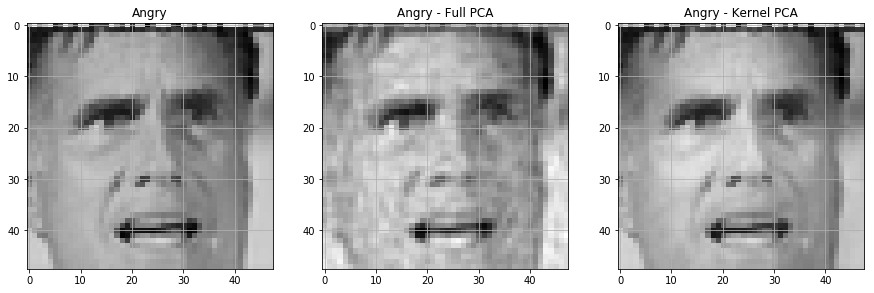

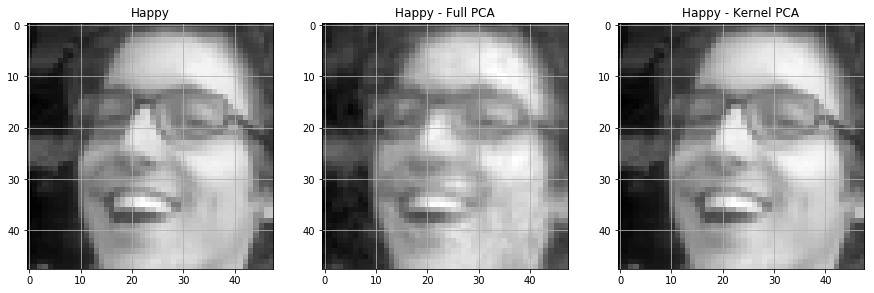

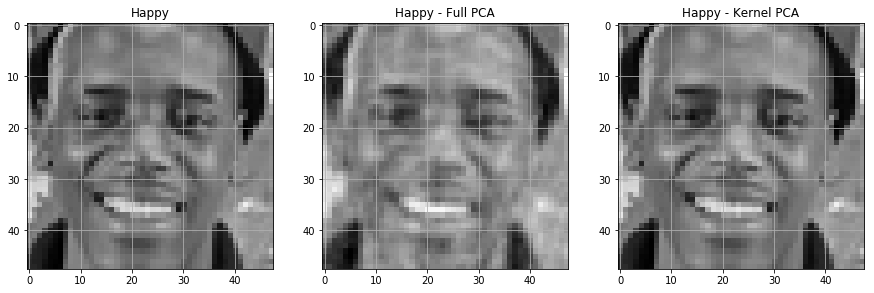

In [19]:
import warnings
# warnings.simplefilter('ignore', DeprecationWarning)
# warnings.simplefilter("always",DeprecationWarning)
def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1)
    plt.imshow(X[idx_to_reconstruct].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(names[y[idx_to_reconstruct]])
    plt.grid()
    
    plt.subplot(1,3,2)
    plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(names[y[idx_to_reconstruct]] + ' - Full PCA')
    plt.grid()
    
    plt.subplot(1,3,3)
    plt.imshow(reconstructed_image_kpca.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(names[y[idx_to_reconstruct]] + ' - Kernel PCA')
    plt.grid()

idx_to_reconstruct1 = int(np.random.rand(1)*len(X))
plt_reconstruct(idx_to_reconstruct1)
idx_to_reconstruct2 = int(np.random.rand(1)*len(X))
plt_reconstruct(idx_to_reconstruct2)
idx_to_reconstruct3 = int(np.random.rand(1)*len(X))
plt_reconstruct(idx_to_reconstruct3)    

And we further reconstructed several more the images using PCA and KPCA for clear comparision. Again as we can see the reconstruction from KPCA is usually better than reconstruction from PCA.

## 3.3 Comparasion Between Linear  Dimensions and Non-linear Dimensions 

#### Compare the representation using non-linear dimensions to using linear dimensions. The method you choose to compare dimensionality methods should quantitatively explain which method is better at representing the images with fewer components. Be aware that mean-squared error may not be a good measurement for kPCA.  Do you prefer one method over another? Why? 

### 3.3.1 Structure Similarity

In [20]:
from skimage.measure import compare_ssim as ssim

In [21]:
np.seterr(divide='ignore', invalid='ignore')
def BrigthnessNormalization(img):
    r = img / np.sqrt( np.sum((img**2), 0) )
    return r

In [27]:
idx_to_compare = idx_to_reconstruct

reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct].reshape(1, -1)))
original_brightness_norm = BrigthnessNormalization(X[idx_to_reconstruct].reshape(h, w))
pca_brightness_norm = BrigthnessNormalization(reconstructed_image.reshape(h, w))
structure_similarity_pca = ssim(original_brightness_norm, pca_brightness_norm, 
                                data_range=pca_brightness_norm.max()-pca_brightness_norm.min())
print('Structure Similarity using PCA: %.2f' % structure_similarity_pca)

Structure Similarity using PCA: 0.90


In [28]:
reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx_to_reconstruct].reshape(1, -1)))
kpca_brightness_norm = BrigthnessNormalization(reconstructed_image_kpca.reshape(h, w))
structure_similarity_kpca = ssim(original_brightness_norm, kpca_brightness_norm, 
                                 data_range=kpca_brightness_norm.max()-kpca_brightness_norm.min())
print('Structure Similarity using KPCA: %.2f' % structure_similarity_kpca)

Structure Similarity using KPCA: 0.96


First we import the ssim package from skimage and then we defined a function for normalizing the brightness of the image. If we don't normalize the brightness of the image, it could influence the result of the structure similarity. 

And we randomly chose one image to compare the structure similarity between the original image and reconstruced image using PCA and of course we also compare the structure similarity between the original image and reconstruced image using KPCA. As we can see, for this randomly chosen image, KPCA performs better than PCA.

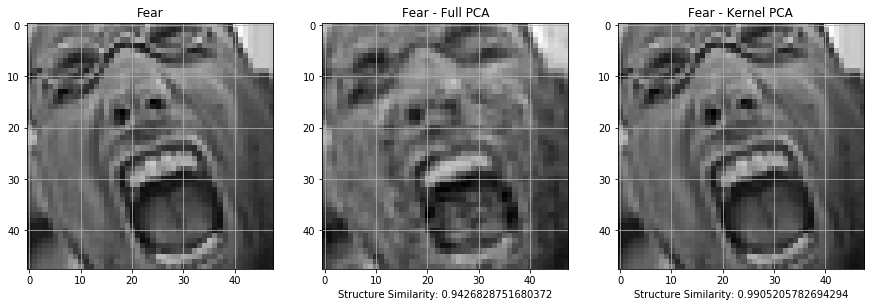

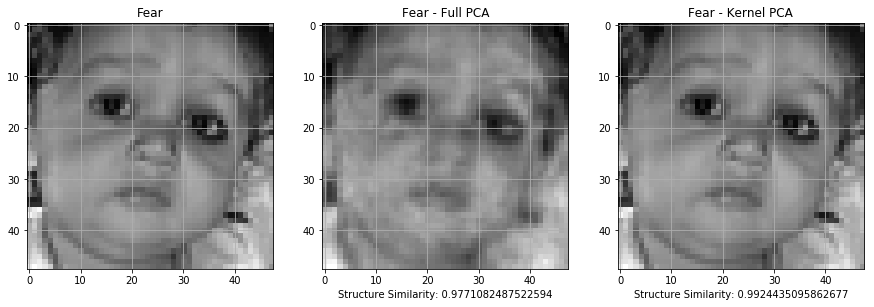

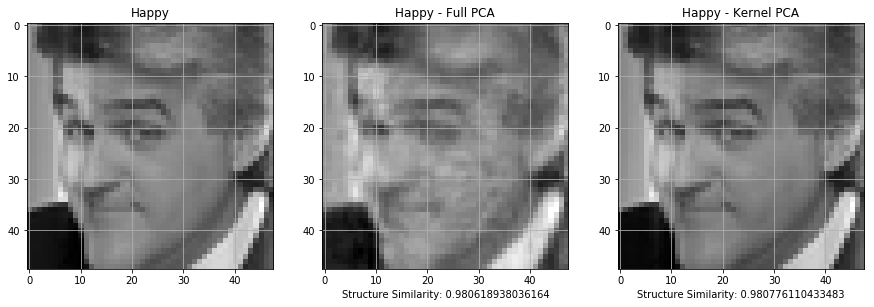

In [25]:
def plt_reconstruct_ssim(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    original_brightness_norm = BrigthnessNormalization(X[idx_to_reconstruct].reshape(h, w))
    pca_brightness_norm = BrigthnessNormalization(reconstructed_image.reshape(h, w))
    structure_similarity_pca = ssim(original_brightness_norm, pca_brightness_norm)
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    kpca_brightness_norm = BrigthnessNormalization(reconstructed_image_kpca.reshape(h, w))
    structure_similarity_kpca = ssim(original_brightness_norm, kpca_brightness_norm)
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,3,1)
    plt.imshow(original_brightness_norm.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(names[y[idx_to_reconstruct]])
    plt.grid()
    
    plt.subplot(1,3,2)
    plt.imshow(pca_brightness_norm.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(names[y[idx_to_reconstruct]] + ' - Full PCA')
    plt.xlabel('Structure Similarity: ' + str(structure_similarity_pca))
    plt.grid()
    
    plt.subplot(1,3,3)
    plt.imshow(kpca_brightness_norm.reshape((h, w)), cmap=plt.cm.gray)
    plt.title(names[y[idx_to_reconstruct]] + ' - Kernel PCA')
    plt.xlabel('Structure Similarity: ' + str(structure_similarity_kpca))
    plt.grid()
    
    
idx_to_reconstruct1 = int(np.random.rand(1)*len(X))
plt_reconstruct_ssim(idx_to_reconstruct1)
idx_to_reconstruct2 = int(np.random.rand(1)*len(X))
plt_reconstruct_ssim(idx_to_reconstruct2)
idx_to_reconstruct3 = int(np.random.rand(1)*len(X))
plt_reconstruct_ssim(idx_to_reconstruct3)  

For more clear comparasion, we visualized several images in their original version, PCA reconstructed version and KPCA reconstructed version again. But this time, we also calculate the structure similarity of each reconstructed image using PCA and KPCA and put them under the reconstructed images. As we can see, for those 9 images, the structure similarity using KPCA is higher than structure similarity using PCA. But what is the general case?

In [26]:
mse = []
kmse = []
pca_better = 0
kpca_better = 0
for idx_to_reconstruct in range(0, len(X), 1):
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    original_brightness_norm = BrigthnessNormalization(X[idx_to_reconstruct].reshape(h, w))
    pca_brightness_norm = BrigthnessNormalization(reconstructed_image.reshape(h, w))
    structure_similarity_pca = ssim(original_brightness_norm, pca_brightness_norm)
    kpca_brightness_norm = BrigthnessNormalization(reconstructed_image_kpca.reshape(h, w))
    structure_similarity_kpca = ssim(original_brightness_norm, kpca_brightness_norm)
    if not np.isnan(structure_similarity_pca):
        mse.append((1 - float(structure_similarity_pca))**2)
    if not np.isnan(structure_similarity_kpca):
        kmse.append((1 - float(structure_similarity_kpca))**2)
    if not np.isnan(structure_similarity_pca) and not np.isnan(structure_similarity_kpca):
        if structure_similarity_pca > structure_similarity_kpca:
            pca_better += 1
        else:
            kpca_better += 1
print('The Mean Square Error of Structure Similarity using PCA: %.6f' % (sum(mse) / len(mse)))
print('The Mean Square Error of Structure Similarity using KPCA: %.6f'% (sum(kmse) / len(kmse)))
print('---------------------------------------------------------------------------')
print('The number of pictures that have better structure similarity result when using KPCA: %d' % (kpca_better))
print('The percentage of pictures that have better structure similarity result when using KPCA: %.2f' % (kpca_better/(kpca_better+pca_better)))

The Mean Square Error of Structure Similarity using PCA: 0.000884
The Mean Square Error of Structure Similarity using KPCA: 0.003527
---------------------------------------------------------------------------
The number of pictures that have better structure similarity result when using KPCA: 959
The percentage of pictures that have better structure similarity result when using KPCA: 0.64


In general case, we calculated similarity of each image using PCA and calculated structure similarity of each image using KPCA. And we calculated the mean square error of structure similarity using PCA and mean squaer error of structure similarity using KPCA. From above, we know MSE of structure similarity when using PCA is even slightly smaller than MSE of structure similarity when using KPCA. It's unexpected, why is that?

Then we calculated the number of images that have better structure similarity result when using KPCA and the percentage of images that have better structure similarity result when using KPCA. The result is about 65% images that have better structure similarity result when using KPCA. So from our perspective, there are some images that get very bad structure similarity when using KPCA and influence the MSE result. We think in general, if KPCA performs well, its reconstructed images are gonna be really well, but when it performs bad, it's gonna be really bad. For our dataset, most of images would be constructed better when using KPCA.

### 3.3.2 Classifier for Prediction

We also implemented a classifier to predict the classifier result for comparing the performance between PCA and KPCA. 

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
X1 = X.copy()
X1 = BrigthnessNormalization(X1)
X2 = X.copy()
X2 = BrigthnessNormalization(X2)

First, we normalize the brightness of the images, then we fed the images to PCA and KPCA.

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1, penalty='l2', multi_class='multinomial', solver='newton-cg', max_iter=1000)
X_train_pca = pca.fit_transform(X1)
X_test_pca = pca.transform(X1)
lr.fit(X_train_pca, y)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=1, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_pca)
print('Accuracy: %.2f' % accuracy_score(y, y_pred))

Accuracy: 0.66


After we process the images in PCA, we fed the processed images to logistic regression classifier for training. Then we used trained classifier to predict the images. As we can see from above, the accuray of prediction using PCA processed images is about 66%.  

In [49]:
# kpca = KernelPCA(n_components=200, kernel='rbf', fit_inverse_transform=True, gamma=12, # very sensitive to the gamma parameter, 
#                  remove_zero_eig=True)
lr1 = LogisticRegression(C=100.0, random_state=1, penalty='l2', multi_class='multinomial', solver='newton-cg', max_iter=1000)
# X_train_kpca = kpca.fit_transform(X_train_std)
# X_test_kpca = kpca.transform(X_test_std)
# lr1.fit(X_train_kpca, y_train)
X_train_kpca = kpca.fit_transform(X2)
X_test_kpca = kpca.transform(X2)
lr1.fit(X_train_kpca, y)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=1, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
y_pred1 = lr1.predict(X_test_kpca)
print('Accuracy: %.2f' % accuracy_score(y, y_pred1))

Accuracy: 0.72


We also process the images in KPCA, and we fed the processed images using KPCA to logistic regression classifier for training. Then we used trained classifier to predict the images. The accuray of prediction using KPCA processed images is 72%, which is better than using PCA which is 66%. 

From structure similarity and classfier, we conclude that KPCA is better at representing the images with fewer components. Because it produce higher structure similarity for most images in out dataset and better prediction accuracy.

## 3.4 Feature Extraction 

#### Perform feature extraction upon the images using any feature extraction technique (e.g., gabor filters, ordered gradients, DAISY, etc.).

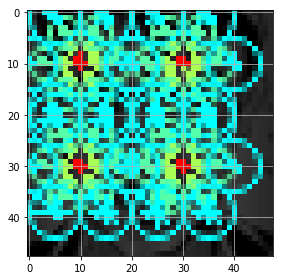

In [51]:
from skimage.feature import daisy
from skimage.io import imshow
# lets first visualize what the daisy descripto looks like
idx_to_reconstruct = int(np.random.rand(1)*len(X))
# Here we do brightness normalization to the image
img = BrigthnessNormalization(X[idx_to_reconstruct].reshape((h, w)))
features, img_desc = daisy(img, step=20, radius=10, rings=3, histograms=6, orientations=8, visualize=True)
imshow(img_desc)
plt.grid()

We pick the daisy() parameters to make the rings almost cover the whole image, meanwhile there are some overlaps between the rings to get the best performance.

In [52]:
# From the following codes, we know that under our picked parameters, we can extract 608 features
features = daisy(img, step=20, radius=10, rings=3, histograms=6, orientations=8, visualize=False)
print(features.shape[0]*features.shape[1]*features.shape[2])

608


From the following codes, we know that under our picked parameters, we can extract 608 features

In [53]:
# 'df2' is our sample dataframe from the original dataset
df4 = df2.copy()
# We reorder the dataframe based on the 'emotion', in order to use heat map later to see how well these features work
df4 = df4.sort_values(by=['emotion'])
df4 = df4.reset_index(drop=True)
for i in range(len(df4.pixels)):
    df4.pixels[i] = np.array(list(map(int,df4.pixels[i].split(' '))))
X_fe = np.array([i for i in df4.pixels])
X_fe = X_fe.astype(float)
# Replace the emotion name with words
namess = df4.emotion
namess = namess.replace(0,'Angry')
namess = namess.replace(1,'Disgust')
namess = namess.replace(2,'Fear')
namess = namess.replace(3,'Happy')
namess = namess.replace(4,'Sad')
namess = namess.replace(5,'Surprise')
namess = namess.replace(6,'Neutral')

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



We reorder the image data in dataframe based on the 'emotion', in order to use heat map later to see how well these features work

In [54]:
# Create a function to take in the row of the matrix and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=20, radius=10, rings=3, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))

In [55]:
# Apply the new function to the entire data, row by row, to get the features for each image
daisy_features = np.apply_along_axis(apply_daisy, 1, X_fe, (h,w))
print(daisy_features.shape)

(1500, 608)


First implemented a function to take in the row of the matrix and return a new feature and we applied the new function to the entire data, row by row, to get the features for each image.

## 3.5 Analysis of Showing Promise for Prediction Task from Feature Extraction

#### Does this feature extraction method show promise for your prediction task? Why? Use visualizations to analyze this questions. For example, visualize the differences between statistics of extracted features in each target class. Another option, use a heat map of the pairwise differences (ordered by class) among all extracted features. Another option, build a nearest neighbor classifier to see actual classification performance.  

### 3.5.1 Classifier for Prediction

In [56]:
lr = LogisticRegression(C=2000.0, random_state=1, penalty='l2', multi_class='multinomial', solver='newton-cg', max_iter=1000)
daisy_features_1 = daisy_features.copy()
lr.fit(daisy_features_1, y)

LogisticRegression(C=2000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [57]:
y_pred_daisy = lr.predict(daisy_features_1)
print('Accuracy: %.2f' % accuracy_score(y, y_pred_daisy))

Accuracy: 0.54


First we fed the features extracted from Daisy to Logistic Regression Classifier to train. After training, we put the features into the classifier for prediction. And the accuracy of predection is 54%, which is not as expected.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn_daisy = KNeighborsClassifier(n_neighbors=3, p=20, metric='minkowski')
knn_daisy.fit(daisy_features_1, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=20,
           weights='uniform')

In [59]:
y_pred_knn_daisy = knn_daisy.predict(daisy_features_1)
print('Accuracy: %.2f' % accuracy_score(y, y_pred_knn_daisy))

Accuracy: 0.49


Then we tried K Nearest Neighbors Classifier. We put the features into the KNN classifier for training and then using trained KNN classifier to predict. And the accuracy of prediction using KNN classifier is 49%, again it's not as expected.

### 3.5.2 Heat Map of the Pairwise Differences

In [60]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler
# Standarize the daisy features to get a better heat map later
std = StandardScaler()
# Find the pairwise distance between all the different image features
dist_matrix = pairwise_distances(std.fit_transform(daisy_features))
# Then we get a 1000*1000 pairwise distance matrix 
print(dist_matrix.shape)

(1500, 1500)


We got the pairwise distance between all the different image features and we will plot a heat map for visualizing pairwise differences as following.

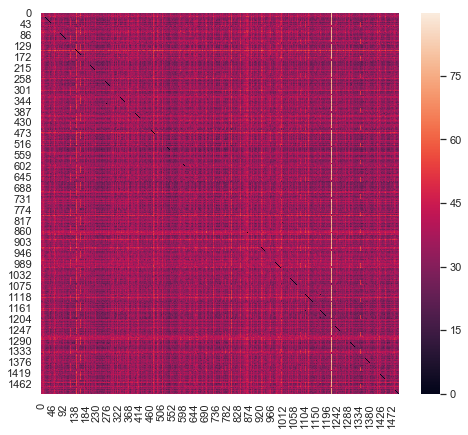

In [61]:
# Pick one of the style to plot
cmap = sns.set(style="darkgrid")
# Set the size of the display figure 
f, ax = plt.subplots(figsize=(8, 7))
# Use a heat map of the pairwise differences (ordered by class) among all extracted features. 
sns.heatmap(dist_matrix, cmap=cmap, annot=False)

We have reordered the images by the 'emotion', there are 7 types of emotion in the dataset. If the extracted features work well to identify a emotion, the pairwise differences should be relatively small within each type of emotion, and the pairwise differences should be large between different types of emotions. In that case, there should be 7 dark squares along the diagnal which represent 7 types of emotion, while other area of the map should be in relatively light color. However, the heat map we got does not match our expectations, there seems no pattern which means using the extracted features can identify an image to any of the 7 types, since there are relatively small distances in each type of emotion. So, the extracted features using daisy do not work well for our task. 

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched con

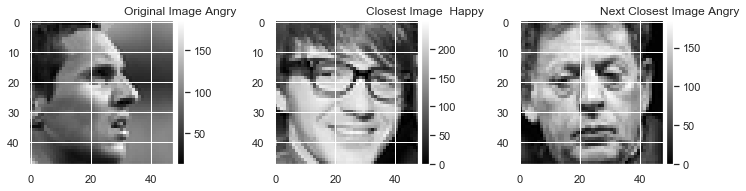

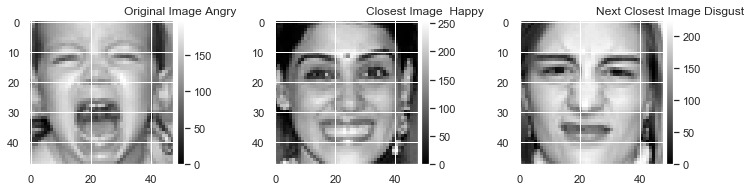

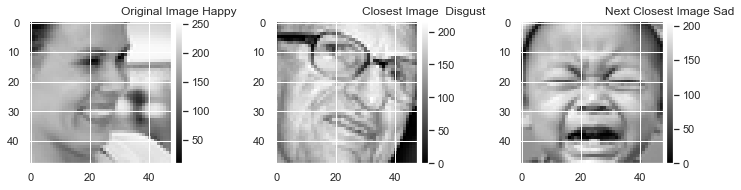

In [63]:
from ipywidgets import widgets  # make this interactive!
from ipywidgets import fixed
import copy
# Let's see the closest and next closest image of one image using the dist_matrix above
n_samples, n_features = X_fe.shape
def closest_image(dmat,idx1):
    distances = copy.deepcopy(dmat[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances[idx2] = np.infty
    idx3 = np.argmin(distances)
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,3,1)
    imshow(X_fe[idx1].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Original Image "+namess[idx1])
    plt.grid()

    plt.subplot(1,3,2)
    imshow(X_fe[idx2].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Closest Image  "+namess[idx2])
    plt.grid()
    
    plt.subplot(1,3,3)
    imshow(X_fe[idx3].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Next Closest Image "+namess[idx3])
    plt.grid()
    
closest_image(idx1=113,dmat=dist_matrix)
closest_image(idx1=200,dmat=dist_matrix)
closest_image(idx1=708,dmat=dist_matrix)

As you can see from the above result, using the pairwise distance matrix before, we may choose a happy image as the closest image for an angry image. Although they may look similar in some way, they are totally different emotions. The reason why this happens may be is that daisy features are extracted from all over the face, however, to identify an emotion we need to focus on certain areas of the face, such as the mouth, canthus. So, these features may work well when we want to find the similar faces, but not the exact emotion on the face.

Based on the results we got, we decided to try Gaber Kernel for feature extraction and take a look.

In [64]:
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi
from scipy import stats
# Use Gabor kernels for feature extraction
# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

            
# compute the filter bank and take statistics of image
def compute_gabor(row, kernels, shape):
    feats = np.zeros((len(kernels), 4), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(row.reshape(shape), kernel, mode='wrap')
        _,_,feats[k,0],feats[k,1],feats[k,2],feats[k,3] = stats.describe(filtered.reshape(-1))
        # mean, var, skew, kurt
        
    return feats.reshape(-1)

idx_to_reconstruct = int(np.random.rand(1)*len(X_fe))

gabr_feature = compute_gabor(X_fe[idx_to_reconstruct], kernels, (h,w))
gabr_feature

array([ 1.93562396e+02,  1.48362249e+03, -1.15572915e+00,  7.83850948e-01,
        5.91730696e+01,  2.14994675e+02, -1.26841186e+00,  1.39892772e+00,
        1.30570960e+02,  4.18494648e+02, -8.58212705e-01,  2.40534604e-01,
        1.94763444e-01,  9.34562132e+00, -1.17550730e-01,  5.10778013e+00,
        1.93564113e+02,  1.47999419e+03, -1.15645269e+00,  7.87209216e-01,
        5.92559703e+01,  1.92476125e+02, -1.24467573e+00,  1.04871603e+00,
        1.31701705e+02,  3.89695835e+02, -9.26569580e-01,  4.28970567e-01,
        3.13691654e-02,  3.20316174e+00, -3.70603176e-03,  3.03338429e+00,
        1.93562396e+02,  1.47925094e+03, -1.15911666e+00,  7.96265132e-01,
        5.91730696e+01,  1.99600842e+02, -1.30426429e+00,  1.30611532e+00,
        1.30570960e+02,  3.90649962e+02, -9.80389124e-01,  6.03821659e-01,
        1.94763444e-01,  9.87864179e+00, -3.82628341e-02,  5.53293526e+00,
        1.93564113e+02,  1.48276059e+03, -1.15837446e+00,  7.92793788e-01,
        5.92559703e+01,  

In [65]:
# Using Gabor kernels we extract 64 features for each image
gabor_stats = np.apply_along_axis(compute_gabor, 1, X_fe, kernels, (h,w))
print(gabor_stats.shape)

(1500, 64)


After we made preparation for gabor kernel. We extract 64 features for each image using gabor kernel.

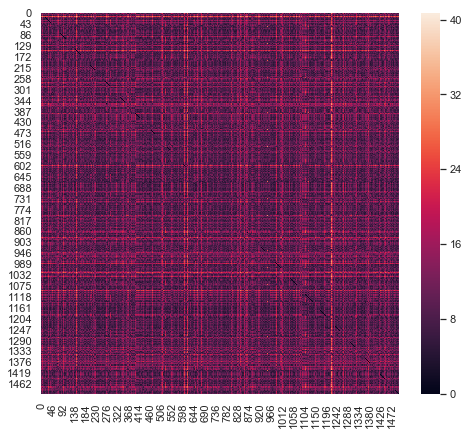

In [66]:
# Compute the pairwise distance matrix for the sample dataset
dist_matrix_gabor = pairwise_distances(std.fit_transform(gabor_stats))
f, ax = plt.subplots(figsize=(8, 7))
# Plot the heat map using the same plot style as before
sns.heatmap(dist_matrix_gabor, cmap=cmap, annot=False)

We computed the pairwise distance matrix for the sample dataset and plotted the heat map.

There seems not much improvement compared with daisy features. The expected pattern still not show up.

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched contrast.

F:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:80: UserWarning:

Float image out of standard range; displaying image with stretched con

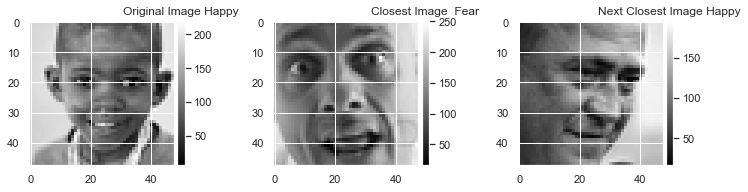

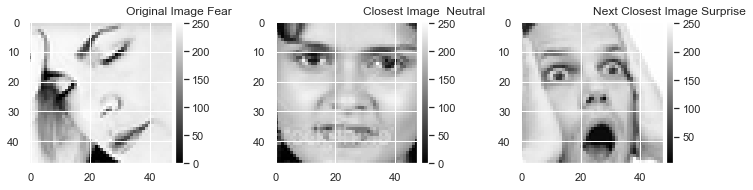

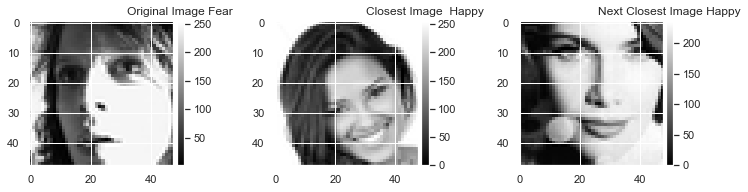

In [67]:
n_samples, n_features = X_fe.shape
def closest_image(dmat,idx1):
    distances = copy.deepcopy(dmat[idx1,:]) # get all image diatances
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    
    distances[idx2] = np.infty
    idx3 = np.argmin(distances)
    
    plt.figure(figsize=(10,16))
    plt.subplot(1,3,1)
    imshow(X_fe[idx1].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Original Image "+namess[idx1])
    plt.grid()

    plt.subplot(1,3,2)
    imshow(X_fe[idx2].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Closest Image  "+namess[idx2])
    plt.grid()
    
    plt.subplot(1,3,3)
    imshow(X_fe[idx3].reshape((h,w)),cmap=plt.cm.gray)
    plt.title("Next Closest Image "+namess[idx3])
    plt.grid()
    
closest_image(idx1=773,dmat=dist_matrix_gabor)
closest_image(idx1=410,dmat=dist_matrix_gabor)
closest_image(idx1=431,dmat=dist_matrix_gabor)

We also use the distance matrix obtained from Gabor kernels to find the closest image and next closest image in the following cell, which turns out not good neither.

Overall, we conclued that these two feature extraction methods didn't show promise for our prediction task. Because the performance from classifier, heat map and cloest image using extracted features didn't go well, which didn't reach our expectations.

# 4. Exceptional Work

#### - You have free reign to provide any additional analyses. 
#### - One idea (required for 7000 level students): perform feature extraction upon the images using a feature extractor that requires key point matching (such as SIFT/SURF/ORB or others). Then build a nearest neighbor classifier using a method appropriate for your chosen features. You will need to investigate appropriate methods for comparisons with your chosen feature extraction technique. NOTE: this often requires some type of brute force matching per pair of images, which can be computationally expensive).

Both SIFT, SURF and ORB are feature extraction algorithms. The SIFT algorithm was patented in Canada by the University of British Columbia and published by David Lowe in 1999. The first step of SIFT is to create scale space. The next one is to calculate  the difference of Gaussians(DoG). Then, compared with points around, it finds the key point. What's next is to find the main orientation. Finally, it generates a keypoint descriptor. The Sift algorithm performs stably when the size, rotation, and illumination changes. For this part of lab2, I use the SIFT algorithm implemented by OpenCV. Let me just take 2 pictures, which are not included in the dataset, as an example.

Text(0.5, 1.0, 'The matches between 2 images')

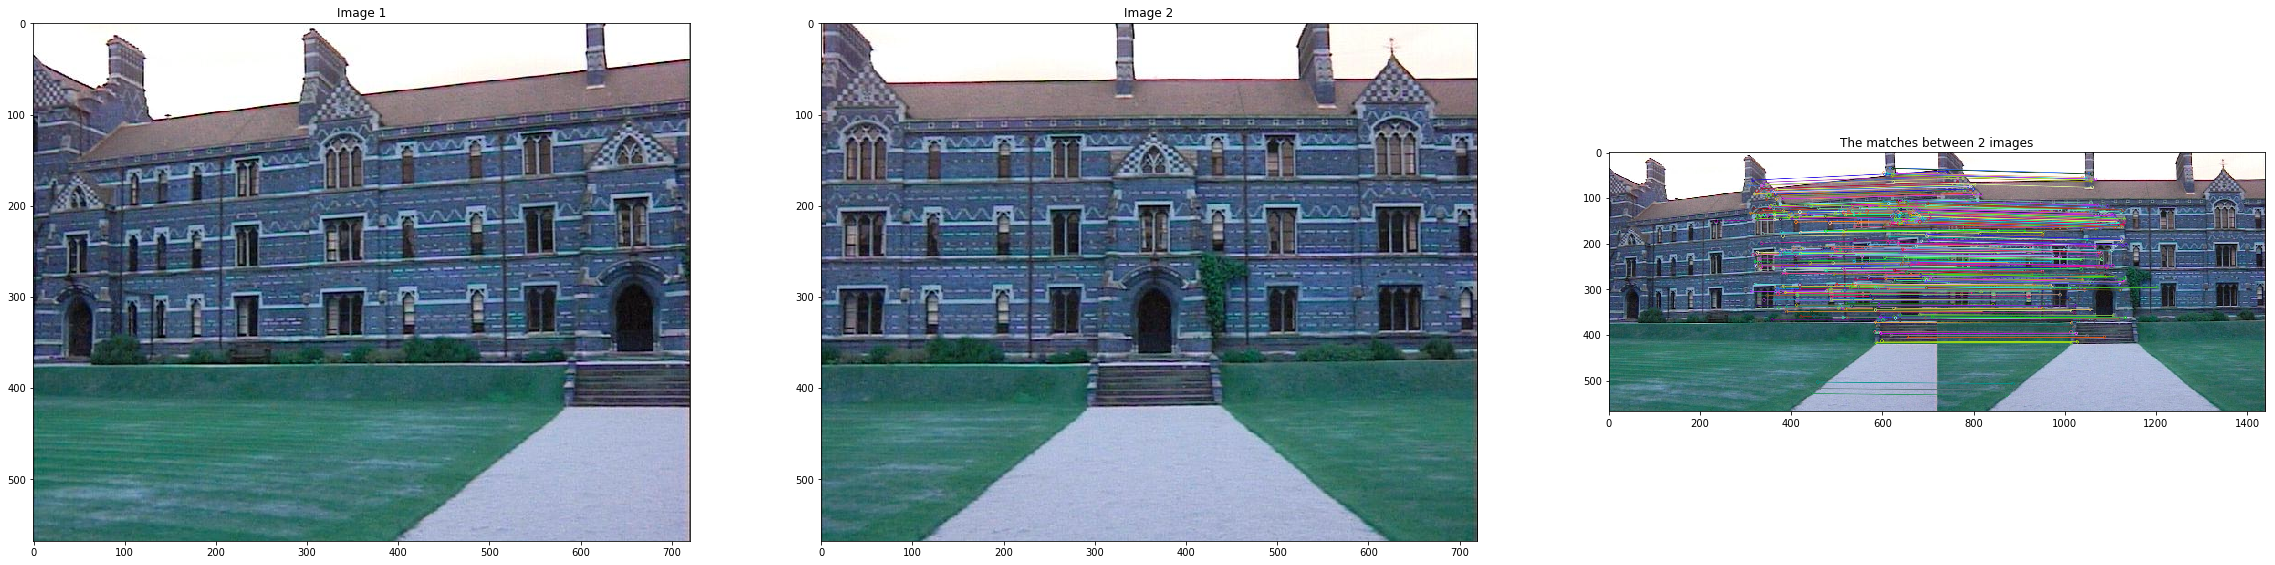

In [77]:
import cv2
import numpy as np

#read images from file
img1=cv2.imread(r'keble_a.jpg')
img2=cv2.imread(r'keble_b.jpg')

#conver the image from rgb to gray
gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#create sift object
sift = cv2.xfeatures2d_SIFT.create()

# Use the sift algorithm to detect key points and compute descriptors
kp1,des1 = sift.detectAndCompute(gray1,None)
kp2,des2 = sift.detectAndCompute(gray2,None)

#Draw jey points on the image
kp_image1 = cv2.drawKeypoints(gray1,kp1,None)
kp_image2 = cv2.drawKeypoints(gray2,kp2,None)

#Combine 2 images
hmerge = np.hstack((kp_image1, kp_image2))

#create a Brute-force descriptor matcher
bf = cv2.BFMatcher()
#Finds the 2 best matches for each descriptor from a query set.
matches = bf.knnMatch(des1,des2, k=2)
good = []

for m,n in matches:
    #smaller thresholds, more accurate matching
    if m.distance < 0.5*n.distance:
        good.append([m])
mimg = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

plt.figure(figsize=(40,10))
plt.subplot(1,3,1)
plt.imshow(img1)
plt.title("Image 1")

plt.subplot(1,3,2)
plt.imshow(img2)
plt.title("Image 2")

plt.subplot(1,3,3)
plt.imshow(mimg)
plt.title("The matches between 2 images")

The images above show that even the object is multi-angle photographed, the SIFT algorithm can perfectly match the features. So, let's use the SIFT to find out if this algorithm can distinguish the same expression.

In [84]:
from PIL import Image
total_number=0
correct_number=0
for index_to_match in range(len(X)):
    for index_to_be_matched in range(len(X)):
        if(index_to_match<index_to_be_matched):
            
            pixel1=X[index_to_match].reshape(48,48)
            im1 = Image.fromarray(pixel1).convert('L')
            
            pixel2=X[index_to_be_matched].reshape(48,48)
            im2 = Image.fromarray(pixel2).convert('L')
            
            kp1,des1 = sift.detectAndCompute(np.asarray(im1),None)
            kp2,des2 = sift.detectAndCompute(np.asarray(im2),None)
            
            kp_image1 = cv2.drawKeypoints(np.asarray(im1),kp1,None)
            kp_image2 = cv2.drawKeypoints(np.asarray(im2),kp2,None)
            
            #Combine 2 images
            hmerge = np.hstack((kp_image1, kp_image2))
            
            #create a Brute-force descriptor matcher
            bf = cv2.BFMatcher()
            #Finds the 2 best matches for each descriptor from a query set.
            matches = bf.knnMatch(des1,des2, k=2)
            
            good = []
            
            for m,n in matches:
                #smaller thresholds, more accurate matching
                if m.distance < 0.6*n.distance:
                    good.append([m])
            if(y[index_to_match]==y[index_to_be_matched]):
                total_number=total_number+1
                if(len(good)/len(matches)>=0.099):
                    correct_number=correct_number+1
print("Accuracy: %.2f" % (correct_number/total_number))

Accuracy: 0.00


The above result show that the SIFT algorithm does not have the ability to distinguish expressions. The reason is that the SIFT algoritm finds key points by compare the key point with the points around. So, if almost every point is different, the SIFT algorithm could not match the key point.